# Modelos para a classificação de diabetes


É importante ressaltar que os dados do Vigitel não devem ser analisados no Excel, do pacote Office (ou programa semelhante), pois a amostra do Vigitel leva em consideração fatores de ponderação para a análise de dados.

É necessário o uso de programas como o Epi Info ou R, ou, ainda, Stata, SPSS, SAS, entre outros, que possuem módulos de análise específicos para a utilização de fatores de ponderação

Link da base: https://svs.aids.gov.br/download/Vigitel/

trabalho relacionado que usou vigitel: https://www.scielo.br/j/ress/a/6hn69ts9c5mkPjHcGBMBbGJ/?lang=pt

referências:
artigo que usa métodos de ml para prever diabetico ou não
https://www.mdpi.com/1424-8220/22/16/6155

# Tratamento de dados

#### Bibliotecas e setar diretório

rodar e reiniciar..

In [ ]:
# try:
#   import dython
#   from dython.nominal import associations
# except:
#   ! pip install dython
#   import dython
#   from dython.nominal import associations

In [ ]:
import xgboost as xgb
import multiprocessing

In [ ]:
# !pip uninstall shap
# !pip install shap

In [ ]:
# !kill -9 -1

In [ ]:

# import pkg_resources
# # pkg_resources.require("numpy== 1.22.4")
# import numpy as np
# !pip show numpy

# import dython
# from dython.nominal import associations

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 250)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

In [ ]:

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import de dados

In [ ]:
# read file from google drive at folder databetes
# file_path = 'drive/My Drive/databetes/Vigitel-2021-peso-rake.xls'
# file_path = 'drive/My Drive/databetes/Vigitel-2020-peso-rake.xls'
file_path = 'drive/My Drive/databetes/data/processed/df_tratado.csv'
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df = pd.read_csv(file_path)

In [ ]:
file_path = 'drive/My Drive/databetes/data/processed/df_train.csv'
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_train = pd.read_csv(file_path)

In [ ]:
df_train

,index,chave,replica,ano,cidade,região,sexo,idade (anos),faixa etária (anos),grau escolaridade,pressão alta,bebida alcoólica,freq alcool,exercício físico,cor,peso (kg),altura (cm),imc,classe imc,freq horta,freq refrigerante,moradores,fumante,posse plano saúde,idade início diabetes,diabetes,repetições
0,101195,11316237033,14,2019,Salvador,Nordeste,feminino,76,65+,3º grau ou curso superior,sim,não,NaN,não,parda,76.0,158.0,30.4,obesidade classe I,3 a 4 dias por semana,1 a 2 dias por semana,4,não,"sim, apenas um",64.0,sim,1
1,33918,99215612046,11,2017,Rio de Janeiro,Sudeste,feminino,82,65+,2º grau ou colégio ou técnico ou normal ou cie...,sim,sim,menos de 1 dia por semana,sim,branca,80.0,168.0,28.3,sobrepeso,5 a 6 dias por semana,nunca,2,não,"sim, apenas um",70.0,sim,1
2,134394,40313159025,7,2020,Belém,Norte,feminino,45,45 a 54,2º grau ou colégio ou técnico ou normal ou cie...,não,não,NaN,sim,branca,58.0,158.0,23.2,adequado ou eutrófico,todos os dias (inclusive sábado e domingo),nunca,5,não,"sim, apenas um",NaN,sim,1
3,33227,27216782040,7,2017,Rio de Janeiro,Sudeste,feminino,42,35 a 44,2º grau ou colégio ou técnico ou normal ou cie...,sim,não,NaN,sim,parda,84.0,160.0,32.8,obesidade classe I,5 a 6 dias por semana,5 a 6 dias por semana,5,não,"sim, apenas um",39.0,sim,1
4,52286,28316868043,12,2018,Recife,Nordeste,feminino,57,55 a 64,1º grau ou fundamental ou supletivo de 1º grau,sim,não,NaN,não,parda,55.0,160.0,21.5,adequado ou eutrófico,5 a 6 dias por semana,quase nunca,3,não,"sim, apenas um",40.0,sim,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106756,55515,22362468029,22,2018,Teresina,Nordeste,feminino,52,45 a 54,2º grau ou colégio ou técnico ou normal ou cie...,sim,não,NaN,sim,parda,68.0,155.0,28.3,sobrepeso,3 a 4 dias por semana,quase nunca,5,não,"sim, apenas um",NaN,não,1
106757,133462,22361179061,26,2020,Macapá,Norte,masculino,37,35 a 44,2º grau ou colégio ou técnico ou normal ou cie...,não,sim,menos de 1 dia por semana,sim,parda,89.0,165.0,32.7,obesidade classe I,1 a 2 dias por semana,quase nunca,4,não,não,NaN,não,1
106758,95376,58392197026,25,2019,Aracajú,Nordeste,feminino,46,45 a 54,1º grau ou fundamental ou supletivo de 1º grau,não,não,NaN,sim,branca,82.0,156.0,33.7,obesidade classe I,5 a 6 dias por semana,nunca,3,não,"sim, apenas um",NaN,não,1
106759,2078,97328366058,18,2017,Goiânia,Centro-Oeste,feminino,60,55 a 64,2º grau ou colégio ou técnico ou normal ou cie...,sim,não,NaN,sim,parda,62.0,162.0,23.6,adequado ou eutrófico,todos os dias (inclusive sábado e domingo),quase nunca,2,não,"sim, apenas um",NaN,não,1


In [ ]:
df_train['grau escolaridade'].unique()

array(['3º grau ou curso superior',
       '2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau',
       '1º grau ou fundamental ou supletivo de 1º grau', 'curso primário',
       'pós-graduação (especialização, mestrado, doutorado)',
       'nunca estudou', 'curso ginasial ou ginásio', 'admissão'],
      dtype=object)

In [ ]:
file_path = 'drive/My Drive/databetes/data/processed/df_val.csv'
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_val = pd.read_csv(file_path)

In [ ]:
file_path = 'drive/My Drive/databetes/data/processed/df_test.csv'
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_test = pd.read_csv(file_path)

In [ ]:
def preprocess_subset(df):
  rename_cols_dict = {
                            'q6':'idade (anos)',
                            'classe imc': 'classe_imc',
                            'grau escolaridade':'grau_escolaridade',
                            'bebida alcoólica':'bebida_alcoolica',
                            'freq alcool':'freq_alcool',
                            'exercício físico':'exercicio_fisico',
                            'q45':'freq_exercicio',
                            'pressão alta':'pressao_alta',
                            'faixa etária (anos)':'faixa_etaria'
                                }

  df = df.rename(columns=rename_cols_dict)
  df_model = df[['imc','pressao_alta','grau_escolaridade','bebida_alcoolica','exercicio_fisico','freq_alcool','faixa_etaria','diabetes']]
  # Mapear os valores categóricos - 0 não bebe 7 bebe todos os dias
  mapping = {
      float('nan'):0 ,
      '1 a 2 dias por semana': 2,
      '3 a 4 dias por semana': 4,
      'menos de 1 dia por semana': 2,
      'todos os dias (inclusive sábado e domingo)': 7,
      'menos de 1 dia por mês': 1,
      '5 a 6 dias por semana': 5,
      '6 a 7 dias por semana': 6
  }

  # Adicionar a nova coluna
  df_model['cat_alcool'] = df_model['freq_alcool'].map(mapping)
  df_model = df_model.drop(columns=['bebida_alcoolica','freq_alcool'])
  def one_hot_encode(df,cols):
    # checar se são todos uniques
    # for col in cols:
      # display(df[col].unique())
    df = pd.get_dummies(data=df, columns=cols)
    display(df)
    return df

  # df_model = one_hot_encode(df_model,cols=['pressao_alta','exercicio_fisico','grau_escolaridade','bebida_alcoolica','faixa_etaria'])
  #convertendo a categoria de alcool em categorica
  df_model = one_hot_encode(df_model,cols=['pressao_alta','exercicio_fisico','grau_escolaridade','cat_alcool','faixa_etaria'])

  df_model['diabetes'] = df_model['diabetes'].map({'não':0,
                                                              'sim':1
                                                              })
  return df_model

In [ ]:
df_train = preprocess_subset(df_train)
df_train

<ipython-input-15-3e54bcb9ed0c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['cat_alcool'] = df_model['freq_alcool'].map(mapping)


,imc,diabetes,pressao_alta_não,pressao_alta_sim,exercicio_fisico_não,exercicio_fisico_sim,grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau,grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau,grau_escolaridade_3º grau ou curso superior,grau_escolaridade_admissão,grau_escolaridade_curso ginasial ou ginásio,grau_escolaridade_curso primário,grau_escolaridade_nunca estudou,"grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)",cat_alcool_0,cat_alcool_1,cat_alcool_2,cat_alcool_4,cat_alcool_5,cat_alcool_7,faixa_etaria_18 a 24,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+
0,30.4,sim,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,28.3,sim,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,23.2,sim,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,32.8,sim,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,21.5,sim,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106756,28.3,não,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106757,32.7,não,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
106758,33.7,não,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106759,23.6,não,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


,imc,diabetes,pressao_alta_não,pressao_alta_sim,exercicio_fisico_não,exercicio_fisico_sim,grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau,grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau,grau_escolaridade_3º grau ou curso superior,grau_escolaridade_admissão,grau_escolaridade_curso ginasial ou ginásio,grau_escolaridade_curso primário,grau_escolaridade_nunca estudou,"grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)",cat_alcool_0,cat_alcool_1,cat_alcool_2,cat_alcool_4,cat_alcool_5,cat_alcool_7,faixa_etaria_18 a 24,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+
0,30.4,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,28.3,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,23.2,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,32.8,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,21.5,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106756,28.3,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106757,32.7,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
106758,33.7,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106759,23.6,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_val = preprocess_subset(df_val)
df_val

<ipython-input-15-3e54bcb9ed0c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['cat_alcool'] = df_model['freq_alcool'].map(mapping)


,imc,diabetes,pressao_alta_não,pressao_alta_sim,exercicio_fisico_não,exercicio_fisico_sim,grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau,grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau,grau_escolaridade_3º grau ou curso superior,grau_escolaridade_admissão,grau_escolaridade_curso ginasial ou ginásio,grau_escolaridade_curso primário,grau_escolaridade_nunca estudou,"grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)",cat_alcool_0,cat_alcool_1,cat_alcool_2,cat_alcool_4,cat_alcool_5,cat_alcool_7,faixa_etaria_18 a 24,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+
0,33.8,sim,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,28.4,sim,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,25.2,sim,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,24.8,sim,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,25.4,sim,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38102,23.3,não,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
38103,27.1,não,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
38104,22.5,não,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
38105,27.0,não,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


,imc,diabetes,pressao_alta_não,pressao_alta_sim,exercicio_fisico_não,exercicio_fisico_sim,grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau,grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau,grau_escolaridade_3º grau ou curso superior,grau_escolaridade_admissão,grau_escolaridade_curso ginasial ou ginásio,grau_escolaridade_curso primário,grau_escolaridade_nunca estudou,"grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)",cat_alcool_0,cat_alcool_1,cat_alcool_2,cat_alcool_4,cat_alcool_5,cat_alcool_7,faixa_etaria_18 a 24,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+
0,33.8,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,28.4,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,25.2,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,24.8,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,25.4,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38102,23.3,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
38103,27.1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
38104,22.5,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
38105,27.0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df

,chave,replica,ano,cidade,região,sexo,idade (anos),faixa etária (anos),grau escolaridade,pressão alta,bebida alcoólica,freq alcool,exercício físico,cor,peso (kg),altura (cm),imc,classe imc,freq horta,freq refrigerante,moradores,fumante,posse plano saúde,idade início diabetes,diabetes
0,1,1,2015,Aracajú,Nordeste,masculino,59,55 a 64,1º grau ou fundamental ou supletivo de 1º grau,não,não,NaN,não,branca,76.0,172.0,25.7,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,3,não,não,NaN,não
1,2,1,2015,Aracajú,Nordeste,feminino,20,18 a 24,2º grau ou colégio ou técnico ou normal ou cie...,sim,não,NaN,não,parda,84.0,162.0,32.0,obesidade classe I,5 a 6 dias por semana,1 a 2 dias por semana,7,não,não,NaN,não
2,4,1,2015,Aracajú,Nordeste,feminino,32,25 a 34,"pós-graduação (especialização, mestrado, douto...",não,não,NaN,sim,preta,45.0,160.0,17.6,baixo peso,3 a 4 dias por semana,quase nunca,2,não,"sim, apenas um",NaN,não
3,5,1,2015,Aracajú,Nordeste,feminino,70,65+,2º grau ou colégio ou técnico ou normal ou cie...,sim,sim,1 a 2 dias por semana,sim,parda,62.0,153.0,26.5,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,2,não,"sim, apenas um",NaN,não
4,7,1,2015,Curitiba,Sul,feminino,84,65+,curso primário,sim,não,NaN,não,branca,51.0,140.0,26.0,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,1,não,"sim, apenas um",84.0,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235425,72213241096,33,2021,São Paulo,Sudeste,feminino,72,65+,3º grau ou curso superior,não,não,NaN,não,parda,44.0,153.0,18.8,adequado ou eutrófico,quase nunca,nunca,2,não,não,NaN,não
235426,45314403046,26,2021,Belo Horizonte,Sudeste,feminino,67,65+,"pós-graduação (especialização, mestrado, douto...",sim,sim,1 a 2 dias por semana,não,parda,64.0,156.0,26.3,sobrepeso,todos os dias (inclusive sábado e domingo),quase nunca,6,não,"sim, mais de um",NaN,não
235427,26374242025,4,2021,Vitória,Sudeste,feminino,75,65+,3º grau ou curso superior,não,sim,menos de 1 dia por semana,não,parda,60.0,147.0,27.8,sobrepeso,todos os dias (inclusive sábado e domingo),quase nunca,4,não,"sim, apenas um",NaN,não
235428,22312495026,36,2021,Porto Alegre,Sul,feminino,77,65+,"pós-graduação (especialização, mestrado, douto...",sim,não,NaN,não,preta,58.0,162.0,22.1,adequado ou eutrófico,todos os dias (inclusive sábado e domingo),nunca,1,não,não,NaN,não


Contagem de dados nulos

In [ ]:
nas_count = df.isna().sum()[df.isna().sum()>0]
nas_count = nas_count.sort_values()

In [ ]:
nas_count

freq alcool              143036
idade início diabetes    215929
dtype: int64

In [ ]:
diabetes_count = df['diabetes'].value_counts()
diabetes_count

não    212432
sim     22998
Name: diabetes, dtype: int64

## Subset para as variáveis selecionadas

faixa etária
escolaridade
IMC
pressão alta
frequência de consumo de álcool
cor
atividade física

todo checar se todos os nans correspondem a não

# Correlação

In [ ]:
def correlogram(df, limiar,offset = 0.08):
    df_selec_corr = df.corr(method='pearson')
    limiar = limiar
    nr = df_selec_corr.shape[0]
    C = df_selec_corr.to_numpy()
    M = np.zeros((nr, nr))

    for i in range(nr):
        for j in range(nr):
            if abs(C[i, j]) >= abs(limiar) and i != j:
                M[i, j] = 1

    np.set_printoptions(threshold=np.inf)

    n = M.shape[0]
    plt.figure(figsize=(8, 8))
    plt.rcParams.update({'font.size': 8})
    plt.axis('off')
    axis = np.linspace(0, 2 * np.pi, n, endpoint=False)
    x, y = np.cos(axis), np.sin(axis)
    offset = offset  # Adjust the offset value as needed

    for i in range(n):
        for j in range(i + 1, n):
            if M[i, j] == 1:
                correlation = C[i, j]
                line_color = 'b' if correlation >= 0 else 'r'  # Use blue for positive correlation, red for negative correlation
                line_width = abs(correlation) * 2  # Scale line width based on correlation magnitude
                plt.plot((x[i], x[j]), (y[i], y[j]), color=line_color, linewidth=line_width)

    plt.scatter(x, y)

    for i, txt in enumerate(df_selec_corr.columns.values):
        if len(txt) > 10:
            txt = txt[:10] + '...' + txt[-10:]  # Truncate the string if it's longer than 10 characters
        if txt == 'diabetes':
            plt.annotate(txt, (x[i] , y[i]), weight='bold', ha='center', va='center')
        elif y[i] >= 0:
            if x[i] < 0:
                plt.annotate(txt, (x[i] - offset, y[i] + offset))  # Add negative offset for left top annotations
                plt.arrow(x[i], y[i] , -0.4*offset, 0.4*offset, color='black', width=0.005, head_width=0.03, head_length=0.03)
            else:
                plt.annotate(txt, (x[i] + offset, y[i] + offset))  # Add positive offset for right top annotations
                plt.arrow(x[i] , y[i] , 0.4*offset, 0.4*offset, color='black', width=0.005, head_width=0.03, head_length=0.03)
        else:
            if x[i] < 0:
                plt.annotate(txt, (x[i] - offset, y[i] - offset))  # Add negative offset for left bottom annotations
                plt.arrow(x[i] , y[i] , -0.4*offset, -0.4*offset, color='black', width=0.005, head_width=0.03, head_length=0.03)
            else:
                plt.annotate(txt, (x[i] + offset, y[i] - offset))  # Add positive offset for right bottom annotations
                plt.arrow(x[i], y[i], 0.4*offset, -0.4*offset, color='black', width=0.005, head_width=0.03, head_length=0.03)
    plt.show()

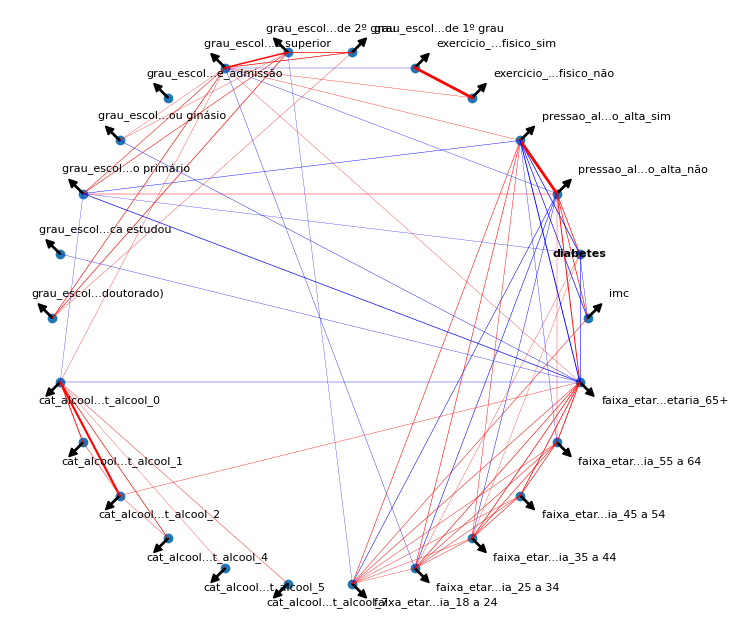

In [ ]:
correlogram(df_train,limiar=0.1)

## Selecionando após correlograma

In [ ]:
# df_model = df_model[['imc','pressao_alta_sim','cat_alcool_7','grau_escolaridade_curso primário','faixa_etaria_65+','diabetes']]

# Modelagem

## Bibliotecas e funções

In [ ]:
# model training
from sklearn import linear_model
# Check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
from sklearn.linear_model import SGDClassifier # Log losss for logistic regressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import OneClassSVM

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import precision_recall_fscore_support
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import matthews_corrcoef, make_scorer
! pip -q install optuna
import optuna

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn import tree
# tree.plot_tree(model.estimators_[0])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
def train_model(X_train, X_val, y_train, y_val, grid_search=False,trials=10,view_trees=False,model='baseline'):

    scaler = MinMaxScaler()
    normalized_train_X = scaler.fit_transform(X_train)

    X_train = normalized_train_X
    # normalize X validation
    normalized_X_val = scaler.fit_transform(X_val)
    X_val = normalized_X_val
    if grid_search:
      print("user chose to do gridsearch")
      def create_model(trial):

        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
        }

        model = RandomForestClassifier(random_state=SEED, **params)

        return model

      def objective(trial:optuna.trial.Trial):
          params = {
              'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
              'max_depth': trial.suggest_int('max_depth', 4, 50),
              'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
              'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
          }

          model = create_model(trial)
          model.fit(normalized_train_X, y_train)
          y_pred = model.predict(X_val)
          score = balanced_accuracy_score(y_val, y_pred)
          return score


      study_rf = optuna.create_study(direction='maximize')
      study_rf.optimize(objective, n_trials=trials)

      fig = optuna.visualization.plot_optimization_history(study_rf)
      fig.show()

      # criação do modelo que performou melhor
      print("creating best model predictions")
      model = create_model(study_rf.best_trial)
      display(model)
      display(model.get_params())

      model.fit(normalized_train_X ,y_train)
      y_pred = model.predict(X_val)

    else:
      print("running models with no gridsearch")
      if model =='baseline':
        # baseline
        model = RandomForestClassifier(random_state=SEED,n_estimators= 500, max_depth=30, min_samples_leaf=5, n_jobs=-1)
      elif model =='tuned':
        # tunado sem SMOTE
        model = RandomForestClassifier(max_depth=46, n_estimators=842, random_state=SEED)
      elif model =='tunedsmote':
        # tunado com SMOTE
        model = RandomForestClassifier(max_depth=11, min_samples_leaf=34, min_samples_split=72,
                        n_estimators=160, random_state=SEED)
      elif model =='tunedadasys':
        params = {'bootstrap': True,
                  'ccp_alpha': 0.0,
                  'criterion': 'gini',
                  'max_depth': 8,
                  'max_features': 'sqrt',
                  'min_impurity_decrease': 0.0,
                  'min_samples_leaf': 1,
                  'min_samples_split': 146,
                  'min_weight_fraction_leaf': 0.0,
                  'n_estimators': 272,
                  'oob_score': False,
                  'verbose': 0,
                  'warm_start': False}
        model = RandomForestClassifier(random_state=SEED, **params)
      elif model == 'xgboost':
        xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
        model = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                                      'n_estimators': [50, 100, 200]}, verbose=1,
                          n_jobs=2)
      else:
        print("specify model params")

      model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    try:
      y_pred_proba = model.predict_proba(X_val)[:, 1]
    except:

      y_pred_proba = y_pred
    return model, X_val,y_pred, y_val,y_pred_proba

In [ ]:
def train_model_nn(X_train, X_val, y_train, y_val, grid_search=False,trials=5,view_trees=False,model='baseline'):

    scaler = MinMaxScaler()
    normalized_train_X = scaler.fit_transform(X_train)

    X_train = normalized_train_X
    # normalize X validation
    normalized_X_val = scaler.fit_transform(X_val)
    X_val = normalized_X_val
    if grid_search:
      print("user chose to do gridsearch")

      def create_model(trial):
        n_layers = trial.suggest_int('n_layers', 1, 10)
        layers = []
        for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

        model = MLPClassifier(solver='adam', alpha= trial.suggest_float("alpha", 1e-5,0.1, log=True),
                                    hidden_layer_sizes=tuple(layers),
                                    random_state=SEED, max_iter=10000)

        return model


      def objective(trial):
          params = {
              'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
              'max_depth': trial.suggest_int('max_depth', 4, 50),
              'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
              'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
          }

          model = create_model(trial)
          model.fit(normalized_train_X, y_train)
          y_pred = model.predict(X_val)
          score = balanced_accuracy_score(y_val, y_pred)
          return score


      study_rf = optuna.create_study(direction='maximize')
      study_rf.optimize(objective, n_trials=trials)

      fig = optuna.visualization.plot_optimization_history(study_rf)
      fig.show()

      # criação do modelo que performou melhor
      print("creating best model predictions")
      model = create_model(study_rf.best_trial)
      display(model)
      display(model.get_params())

      model.fit(normalized_train_X ,y_train)
      y_pred = model.predict(X_val)

    else:
      print("running models with no gridsearch")
      # if model =='baseline':
      #   # baseline
      #   model = RandomForestClassifier(random_state=SEED,n_estimators= 500, max_depth=30, min_samples_leaf=5, n_jobs=-1)
      # elif model =='tuned':
      #   # tunado sem SMOTE
      #   model = RandomForestClassifier(max_depth=46, n_estimators=842, random_state=SEED)
      # elif model =='tunedsmote':
      #   # tunado com SMOTE
      #   model = RandomForestClassifier(max_depth=11, min_samples_leaf=34, min_samples_split=72,
      #                   n_estimators=160, random_state=SEED)
      # elif model =='tunedadasys':
      #   params = {'bootstrap': True,
      #             'ccp_alpha': 0.0,
      #             'criterion': 'gini',
      #             'max_depth': 8,
      #             'max_features': 'sqrt',
      #             'min_impurity_decrease': 0.0,
      #             'min_samples_leaf': 1,
      #             'min_samples_split': 146,
      #             'min_weight_fraction_leaf': 0.0,
      #             'n_estimators': 272,
      #             'oob_score': False,
      #             'verbose': 0,
      #             'warm_start': False}
      #   model = RandomForestClassifier(random_state=SEED, **params)
      # else:
      #   print("specify model params")

      model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    return model, X_val,y_pred, y_val,y_pred_proba

In [ ]:
def print_classification_report(y_val, y_val_pred,y_val_pred_proba=None,auc_metrics=True):
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred)
    print("Acurácia na validação: {:.2f}%".format(val_accuracy * 100))
    print("Acurácia balanceada na validação: {:.2f}%".format(val_balanced_accuracy * 100))

    # Gerando o relatório com diversas métricas
    report = classification_report(y_val, y_val_pred)

    # Exibindo o relatório
    print(report)


    # Plotando a matriz de confusão
    matriz_confusão = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(matriz_confusão, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    plt.close()
    total1=sum(sum(matriz_confusão))
    #####from confusion matrix calculate accuracy
    # accuracy1=(matriz_confusão[0,0]+matriz_confusão[1,1])/total1
    # print ('Accuracy : ', accuracy1)
    sensitivity1 = matriz_confusão[0,0]/(matriz_confusão[0,0]+matriz_confusão[0,1])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = matriz_confusão[1,1]/(matriz_confusão[1,0]+matriz_confusão[1,1])
    print('Specificity : ', specificity1)
    if auc_metrics == True:
      # Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
      fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
      # Calculate AUC score
      auc = roc_auc_score(y_val, y_val_pred_proba)
      print(f'AUC = {auc} ')
      # Plot ROC curve
      plt.figure(figsize=(8, 6))
      plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
      plt.plot([0, 1], [0, 1], 'r--')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC) Curve')
      plt.legend(loc='lower right')
      plt.show()
      plt.close()


## Divisão em X e y

In [ ]:
X_train =  df_train.drop('diabetes', axis=1)

y_train = df_train['diabetes']

In [ ]:
X_train

,imc,pressao_alta_não,pressao_alta_sim,exercicio_fisico_não,exercicio_fisico_sim,grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau,grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau,grau_escolaridade_3º grau ou curso superior,grau_escolaridade_admissão,grau_escolaridade_curso ginasial ou ginásio,grau_escolaridade_curso primário,grau_escolaridade_nunca estudou,"grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)",cat_alcool_0,cat_alcool_1,cat_alcool_2,cat_alcool_4,cat_alcool_5,cat_alcool_7,faixa_etaria_18 a 24,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+
0,30.4,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,28.3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,23.2,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,32.8,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,21.5,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106756,28.3,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106757,32.7,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
106758,33.7,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106759,23.6,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# y_train = pd.DataFrame(y_train)

In [ ]:
X_val =  df_val.drop('diabetes', axis=1)

y_val = df_val['diabetes']

In [ ]:
# y_val = pd.DataFrame(y_val)

In [ ]:
y_val

0        1
1        1
2        1
3        1
4        1
        ..
38102    0
38103    0
38104    0
38105    0
38106    0
Name: diabetes, Length: 38107, dtype: int64

In [ ]:
y_train

0         1
1         1
2         1
3         1
4         1
         ..
106756    0
106757    0
106758    0
106759    0
106760    0
Name: diabetes, Length: 106761, dtype: int64

## Referência métricas

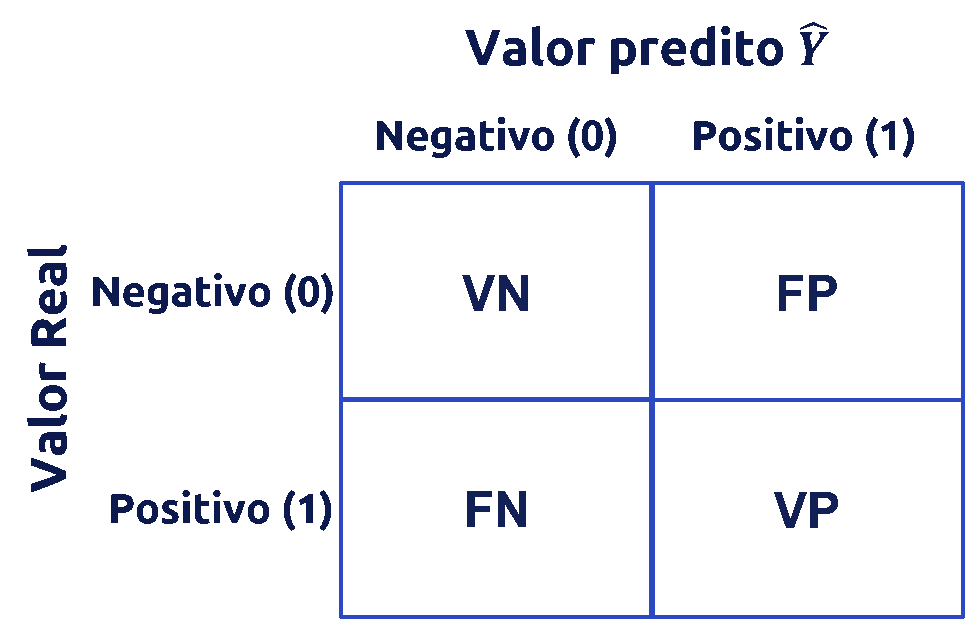![image.png]()

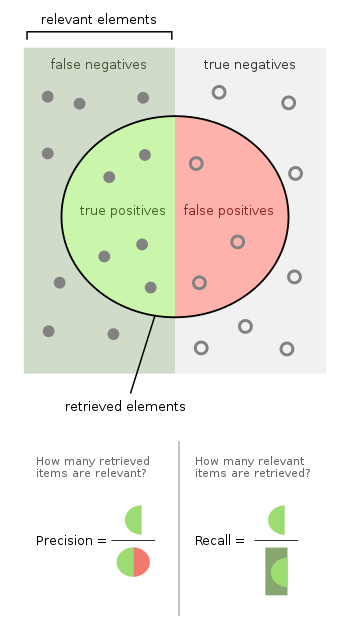

Predizeu que pessoas não eram diabéticas, quando eram. Faremos o balanceamento dos dados utilizando o SMOTE.

# Balanceamento dos dados

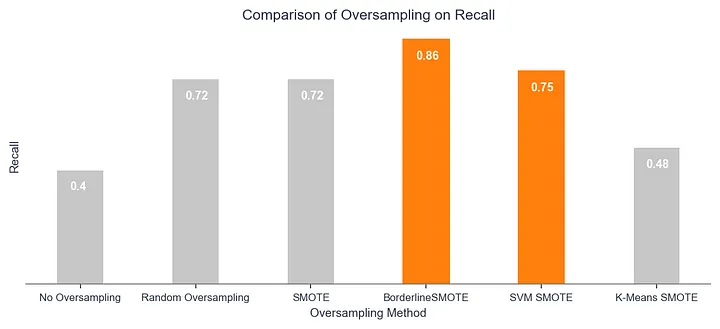

Fonte: https://medium.com/analytics-vidhya/handling-imbalanced-data-by-oversampling-with-smote-and-its-variants-23a4bf188eaf

## SMOTE

O SMOTE é uma técnica de aumentação de dados deve ser aplicada depois de dividir os dados em conjuntos de treinamento e teste. É importante evitar qualquer vazamento de informações do conjunto de teste para o conjunto de treinamento durante o processo de reamostragem

como o smote funciona? https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167

Goal: Increase the minority class so that the data set becomes balanced by creating synthetic observations based upon the existing minority observations.

SMOTE:

What smote does is simple. First it finds the n-nearest neighbors in the minority class for each of the samples in the class . Then it draws a line between the the neighbors an generates random points on the lines.

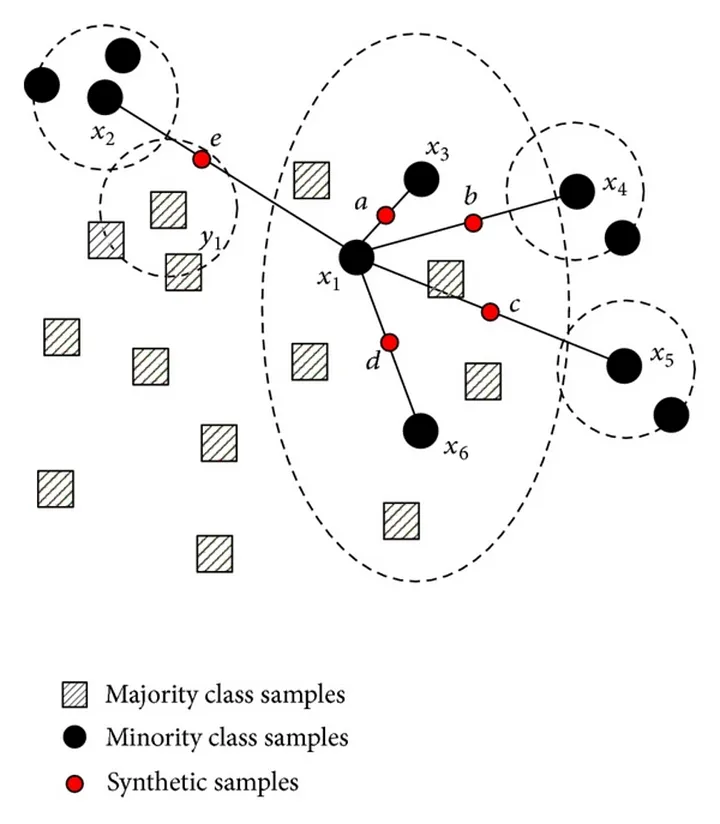

Select a sample, let’s call it O (for Origin), from the minority class randomly

Find the K-Nearest Neighbours of O that belong to the same class

Connect O to each of these neighbours using a straight line

Select a scaling factor ‘z’ in the range [0,1] randomly

For each new connection, place a new point on the line (z*100)% away from O. These will be our synthetic samples.

Repeat this process until you get the desired number of synthetic samples

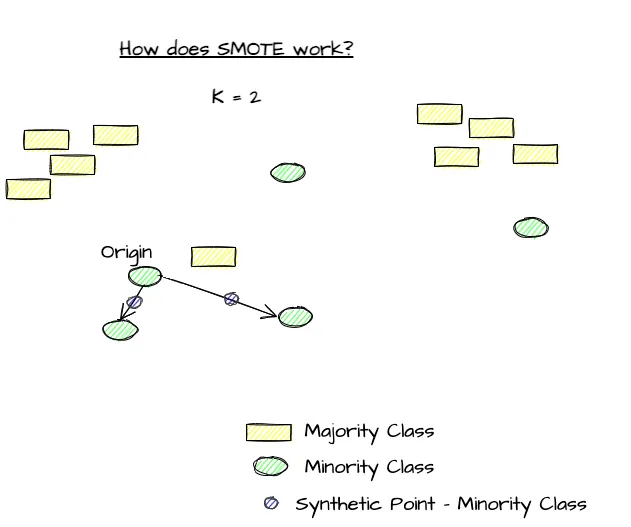

In [ ]:
SEED = 21

In [ ]:
smote = SMOTE(random_state=SEED)
# Upsample the minority class using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Distribuição de diabéticos antes do SMOTE:")
print(y_train.value_counts())

print("Distribuição de diabéticos depois do SMOTE:")
print(y_resampled.value_counts())

Distribuição de diabéticos antes do SMOTE:
0    96129
1    10632
Name: diabetes, dtype: int64
Distribuição de diabéticos depois do SMOTE:
1    96129
0    96129
Name: diabetes, dtype: int64


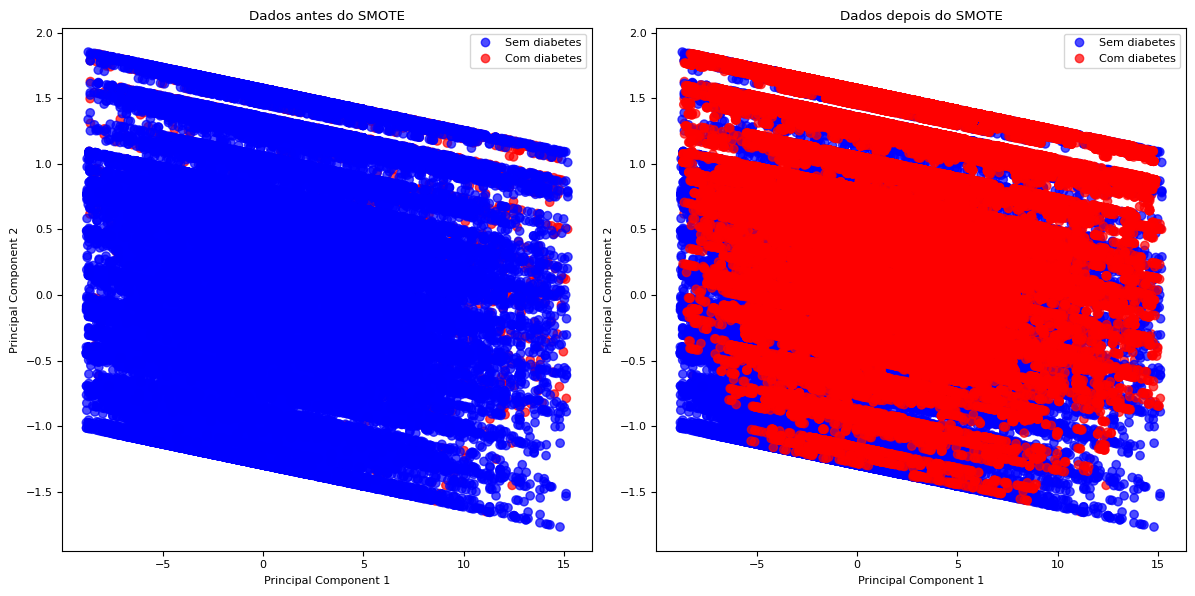

In [ ]:
# Perform PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_resampled_pca = pca.transform(X_resampled)

# Plot the data before and after SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', alpha=0.7)
plt.title('Dados antes do SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[plt.Line2D([], [], color='blue', marker='o', linestyle='None', alpha=0.7, label='Sem diabetes'),
                    plt.Line2D([], [], color='red', marker='o', linestyle='None', alpha=0.7, label='Com diabetes')])

plt.subplot(1, 2, 2)
plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled, cmap='bwr', alpha=0.7)
plt.title('Dados depois do SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[plt.Line2D([], [], color='blue', marker='o', linestyle='None', alpha=0.7, label='Sem diabetes'),
                    plt.Line2D([], [], color='red', marker='o', linestyle='None', alpha=0.7, label='Com diabetes')])

plt.tight_layout()
plt.show()

In [ ]:
# x agora é o resampled
X_train= X_resampled.copy()
y_train = y_resampled.copy()

In [ ]:
# import joblib
# joblib.dump(model, "drive/My Drive/databetes/assets/gustavo/smote_model.pkl")

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=2b8336e1b380e435c3261c954a87bc8bb8f62d2e81e9dc694a00032a890593c7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
import optuna
import optuna.visualization
import lime
import lime.lime_tabular

def train_model_with_lime(X_train, X_val, y_train, y_val, grid_search=False, trials=10, view_trees=False, model='baseline'):
    scaler = MinMaxScaler()
    normalized_train_X = scaler.fit_transform(X_train)
    X_train = normalized_train_X

    # normalize X validation
    normalized_X_val = scaler.transform(X_val)
    X_val = normalized_X_val

    if grid_search:
        print("User chose to do gridsearch")
        def create_model(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
                'max_depth': trial.suggest_int('max_depth', 4, 50),
                'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
            }
            model = RandomForestClassifier(random_state=SEED, **params)
            return model

        def objective(trial: optuna.trial.Trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
                'max_depth': trial.suggest_int('max_depth', 4, 50),
                'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
            }
            model = create_model(trial)
            model.fit(normalized_train_X, y_train)
            y_pred = model.predict(X_val)
            score = balanced_accuracy_score(y_val, y_pred)
            return score

        study_rf = optuna.create_study(direction='maximize')
        study_rf.optimize(objective, n_trials=trials)

        fig = optuna.visualization.plot_optimization_history(study_rf)
        fig.show()

        # Create the best performing model
        print("Creating the best model predictions")
        model = create_model(study_rf.best_trial)
        display(model)
        display(model.get_params())

        model.fit(normalized_train_X, y_train)
        y_pred = model.predict(X_val)
    else:
        print("Running models with no gridsearch")
        if model == 'baseline':
            # Baseline
            model = RandomForestClassifier(random_state=SEED, n_estimators=500, max_depth=30, min_samples_leaf=5,
                                           n_jobs=-1)
        elif model == 'tuned':
            # Tuned without SMOTE
            model = RandomForestClassifier(max_depth=46, n_estimators=842, random_state=SEED)
        elif model == 'tunedsmote':
            # Tuned with SMOTE
            model = RandomForestClassifier(max_depth=11, min_samples_leaf=34, min_samples_split=72,
                                           n_estimators=160, random_state=SEED)
        elif model == 'tunedadasys':
            params = {'bootstrap': True,
                      'ccp_alpha': 0.0,
                      'criterion': 'gini',
                      'max_depth': 8,
                      'max_features': 'sqrt',
                      'min_impurity_decrease': 0.0,
                      'min_samples_leaf': 1,
                      'min_samples_split': 146,
                      'min_weight_fraction_leaf': 0.0,
                      'n_estimators': 272,
                      'oob_score': False,
                      'verbose': 0,
                      'warm_start': False}
            model = RandomForestClassifier(random_state=SEED, **params)
        elif model == 'xgboost':
            xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
            model = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                                             'n_estimators': [50, 100, 200]}, verbose=1,
                                 n_jobs=2)
        else:
            print("Specify model params")

        model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    try:
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    except:
        y_pred_proba = y_pred

    # Lime explanation
    df_lime = df_train.drop('diabetes', axis=1)
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(df_lime.columns),
                                                       class_names=['0', '1'], discretize_continuous=True)
    # explanation = explainer.explain_instance(X_val[0], model.predict_proba, num_features=len(df_train.columns))

    return model, X_val, y_pred, y_val, y_pred_proba, explainer


In [ ]:
model, X_val,y_pred, y_val,y_pred_proba,explainer = train_model_with_lime(X_train, X_val, y_train, y_val,grid_search =False,model='tunedsmote')

Running models with no gridsearch


Acurácia na validação: 66.61%
Acurácia balanceada na validação: 71.33%
              precision    recall  f1-score   support

           0       0.96      0.65      0.78     34366
           1       0.20      0.77      0.31      3741

    accuracy                           0.67     38107
   macro avg       0.58      0.71      0.55     38107
weighted avg       0.89      0.67      0.73     38107



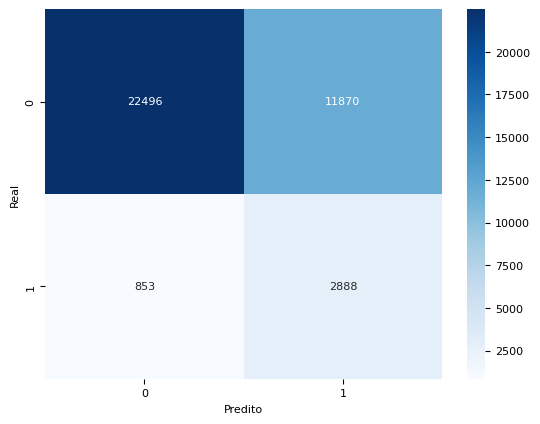

Sensitivity :  0.6546004772158529
Specificity :  0.7719860999732692
AUC = 0.7826449310854927 


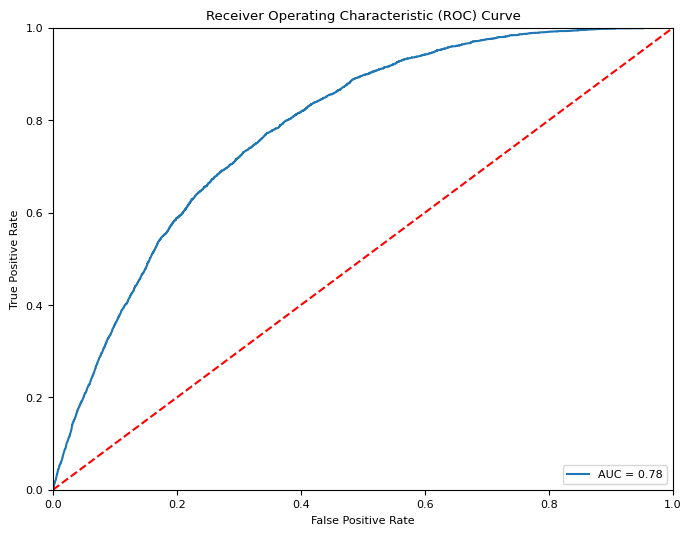

In [ ]:
print_classification_report(y_val, y_pred,y_pred_proba)

In [ ]:
# Lime explanation
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(df_train.columns),
#                                                     class_names=['0', '1'], discretize_continuous=True)
explanation = explainer.explain_instance(X_val[15], model.predict_proba, num_features=len(df_train.columns))

In [ ]:
# print(df_val.columns)
X_val[15]


array([0.57322176, 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ])

pessoas diabéticas, análise de performance

In [ ]:
for i in range(15,20):

  print(f'mostrando valores para a pessoa {i} ')
  if y_val[i]==y_pred[i]:
    print(f"modelo acertou, preveu {y_pred[i]} e era {y_val[i]}")
  else:
    print(f"modelo errou, preveu {y_pred[i]} e era {y_val[i]}")
  df = pd.DataFrame([X_val[i]], columns=df_val.drop('diabetes', axis=1).columns)
  df['diabetes_real']=y_val[i]
  df['diabetes_predito']=y_pred[i]
  display(df)
  explanation = explainer.explain_instance(X_val[i], model.predict_proba, num_features=len(df_train.columns))
  explanation.show_in_notebook(show_table=True)


Output hidden; open in https://colab.research.google.com to view.

pessoas não diabéticas

In [ ]:
for i in range(5000,5005):

  print(f'mostrando valores para a pessoa {i} ')
  if y_val[i]==y_pred[i]:
    print(f"modelo acertou, preveu {y_pred[i]} e era {y_val[i]}")
  else:
    print(f"modelo errou, preveu {y_pred[i]} e era {y_val[i]}")
  df = pd.DataFrame([X_val[i]], columns=df_val.drop('diabetes', axis=1).columns)
  df['diabetes_real']=y_val[i]
  df['diabetes_predito']=y_pred[i]
  display(df)
  explanation = explainer.explain_instance(X_val[i], model.predict_proba, num_features=len(df_train.columns))
  explanation.show_in_notebook(show_table=True)

Output hidden; open in https://colab.research.google.com to view.

testando agregar cada um do modelo

In [ ]:
from pprint import pprint
l =[]
for i in range(15,17):

  print(f'mostrando valores para a pessoa {i} ')
  if y_val[i]==y_pred[i]:
    print(f"modelo acertou, preveu {y_pred[i]} e era {y_val[i]}")
  else:
    print(f"modelo errou, preveu {y_pred[i]} e era {y_val[i]}")
  df = pd.DataFrame([X_val[i]], columns=df_val.drop('diabetes', axis=1).columns)
  df['diabetes_real']=y_val[i]
  df['diabetes_predito']=y_pred[i]
  display(df)

  # exp = explainer.explain_instance(X_val[i],top_labels= 2,num_features=5)
  # print(exp)
  explanation = explainer.explain_instance(X_val[i], model.predict_proba, num_features=len(df_train.columns))
  # Extract feature names and importance scores from the explanation object
  # feature_names = explanation.feature_names()
  # importance_scores = explanation.feature_importances_

  # Create a dataframe from the feature names and importance scores
  # df_explanation = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

  # Print the dataframe
  # display(df_explanation)
  # pprint(explanation,type(explanation))
  a=explanation.as_list()
  l.append(a)
  explanation.show_in_notebook(show_table=True)


Output hidden; open in https://colab.research.google.com to view.

## avaliando no teste do vigitel

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
import optuna
import optuna.visualization
import lime
import lime.lime_tabular

def train_model_with_lime(X_train, X_val, y_train, y_val, grid_search=False, trials=10, view_trees=False, model='baseline'):
    scaler = MinMaxScaler()
    normalized_train_X = scaler.fit_transform(X_train)
    X_train = normalized_train_X

    # normalize X validation
    normalized_X_val = scaler.transform(X_val)
    X_val = normalized_X_val

    if grid_search:
        print("User chose to do gridsearch")
        def create_model(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
                'max_depth': trial.suggest_int('max_depth', 4, 50),
                'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
            }
            model = RandomForestClassifier(random_state=SEED, **params)
            return model

        def objective(trial: optuna.trial.Trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
                'max_depth': trial.suggest_int('max_depth', 4, 50),
                'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
            }
            model = create_model(trial)
            model.fit(normalized_train_X, y_train)
            y_pred = model.predict(X_val)
            score = balanced_accuracy_score(y_val, y_pred)
            return score

        study_rf = optuna.create_study(direction='maximize')
        study_rf.optimize(objective, n_trials=trials)

        fig = optuna.visualization.plot_optimization_history(study_rf)
        fig.show()

        # Create the best performing model
        print("Creating the best model predictions")
        model = create_model(study_rf.best_trial)
        display(model)
        display(model.get_params())

        model.fit(normalized_train_X, y_train)
        y_pred = model.predict(X_val)
    else:
        print("Running models with no gridsearch")
        if model == 'baseline':
            # Baseline
            model = RandomForestClassifier(random_state=SEED, n_estimators=500, max_depth=30, min_samples_leaf=5,
                                           n_jobs=-1)
        elif model == 'tuned':
            # Tuned without SMOTE
            model = RandomForestClassifier(max_depth=46, n_estimators=842, random_state=SEED)
        elif model == 'tunedsmote':
            # Tuned with SMOTE
            model = RandomForestClassifier(max_depth=11, min_samples_leaf=34, min_samples_split=72,
                                           n_estimators=160, random_state=SEED)
        elif model == 'tunedadasys':
            params = {'bootstrap': True,
                      'ccp_alpha': 0.0,
                      'criterion': 'gini',
                      'max_depth': 8,
                      'max_features': 'sqrt',
                      'min_impurity_decrease': 0.0,
                      'min_samples_leaf': 1,
                      'min_samples_split': 146,
                      'min_weight_fraction_leaf': 0.0,
                      'n_estimators': 272,
                      'oob_score': False,
                      'verbose': 0,
                      'warm_start': False}
            model = RandomForestClassifier(random_state=SEED, **params)
        elif model == 'xgboost':
            xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
            model = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                                             'n_estimators': [50, 100, 200]}, verbose=1,
                                 n_jobs=2)
        else:
            print("Specify model params")

        model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    try:
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    except:
        y_pred_proba = y_pred

    # Lime explanation
    # explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(df_train.columns),
    #                                                    class_names=['0', '1'], discretize_continuous=True)
    df_lime = df_train.drop('diabetes', axis=1)
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(df_lime.columns),
                                                       class_names=['0', '1'], discretize_continuous=True)
    # explanation = explainer.explain_instance(X_val[0], model.predict_proba, num_features=len(df_train.columns))

    return model, X_val, y_pred, y_val, y_pred_proba, explainer


In [ ]:
# df_lime = df_train.drop('diabetes', axis=1)
# df_lime

In [ ]:
df_test = preprocess_subset(df_test)
X_test =  df_test.drop('diabetes', axis=1)

y_test = df_test['diabetes']

<ipython-input-15-3e54bcb9ed0c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['cat_alcool'] = df_model['freq_alcool'].map(mapping)


,imc,diabetes,pressao_alta_não,pressao_alta_sim,exercicio_fisico_não,exercicio_fisico_sim,grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau,grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau,grau_escolaridade_3º grau ou curso superior,grau_escolaridade_admissão,grau_escolaridade_curso ginasial ou ginásio,grau_escolaridade_curso primário,grau_escolaridade_nunca estudou,"grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)",cat_alcool_0,cat_alcool_1,cat_alcool_2,cat_alcool_4,cat_alcool_5,cat_alcool_7,faixa_etaria_18 a 24,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+
0,24.1,sim,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,24.7,sim,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,23.5,sim,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,24.1,sim,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,24.4,sim,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7643,30.8,não,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7644,25.2,não,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7645,25.4,não,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7646,24.1,não,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
model, X_test,y_pred, y_test,y_pred_proba,explainer = train_model_with_lime(X_train, X_test, y_train, y_test,grid_search =False,model='tunedsmote')

Running models with no gridsearch


KeyboardInterrupt: ignored

In [ ]:
print_classification_report(y_test, y_pred,y_pred_proba)

In [ ]:
A

## PNS

In [ ]:
import joblib
loaded_model = joblib.load("drive/My Drive/databetes/assets/gustavo/smote_model.pkl")
loaded_model

RandomForestClassifier(max_depth=11, min_samples_leaf=34, min_samples_split=72,
                       n_estimators=160, random_state=21)

In [ ]:
def print_classification_report_with_df(y_val, y_val_pred,y_val_pred_proba=None,auc_metrics=True,state=None):
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred)
    print("Acurácia na validação: {:.2f}%".format(val_accuracy * 100))
    print("Acurácia balanceada na validação: {:.2f}%".format(val_balanced_accuracy * 100))

    # Gerando o relatório com diversas métricas
    report = classification_report(y_val, y_val_pred)

    # Exibindo o relatório
    print(report)


    # Plotando a matriz de confusão
    matriz_confusão = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(matriz_confusão, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    plt.close()
    total1=sum(sum(matriz_confusão))
    #####from confusion matrix calculate accuracy
    # accuracy1=(matriz_confusão[0,0]+matriz_confusão[1,1])/total1
    # print ('Accuracy : ', accuracy1)
    sensitivity1 = matriz_confusão[0,0]/(matriz_confusão[0,0]+matriz_confusão[0,1])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = matriz_confusão[1,1]/(matriz_confusão[1,0]+matriz_confusão[1,1])
    print('Specificity : ', specificity1)
    if auc_metrics == True:
      # Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
      fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
      # Calculate AUC score
      auc = roc_auc_score(y_val, y_val_pred_proba)
      print(f'AUC = {auc} ')
      # Plot ROC curve
      plt.figure(figsize=(8, 6))
      plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
      plt.plot([0, 1], [0, 1], 'r--')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      plt.xlabel('False Positive Rate', fontsize=20)
      plt.ylabel('True Positive Rate', fontsize=20)
      plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
      plt.legend(loc='lower right', fontsize=20)  # Increase the font size of the legend
      plt.show()
      plt.close()

    metrics = [[state,auc, sensitivity1, specificity1,val_balanced_accuracy,val_accuracy]]
    df_metrics = pd.DataFrame(metrics, columns=['Estado','AUC', 'sensitivity', 'specificity', 'Acurácia balanceada','Acurácia'])

    return df_metrics

In [ ]:
def preprocess_subset(df):
  rename_cols_dict = {
                            'bebida_alcoolica':'cat_alcool',
                            'Idade':'faixa_etaria'
                                }

  df = df.rename(columns=rename_cols_dict)

  def one_hot_encode(df,cols):
    # checar se são todos uniques
    # for col in cols:
      # display(df[col].unique())
    df = pd.get_dummies(data=df, columns=cols)
    display(df)
    return df

  # df_model = one_hot_encode(df_model,cols=['pressao_alta','exercicio_fisico','grau_escolaridade','bebida_alcoolica','faixa_etaria'])
  #convertendo a categoria de alcool em categorica
  df_model = one_hot_encode(df,cols=['cat_alcool'])
  for col in ['cat_alcool_3','cat_alcool_4','cat_alcool_5','cat_alcool_6','cat_alcool_7']:
    print(col)
    df_model[col] = 0
  df_model = one_hot_encode(df_model,cols=['pressao_alta','exercicio_fisico','grau_escolaridade','faixa_etaria'])
  # df_model['diabetes'] = df_model['diabetes'].map({'não':0,
  #                                                             'sim':1
  #                                                             })
  return df_model

# df_test = preprocess_subset(df_test)
# df_test

In [ ]:
ordem_colunas = [
    'IMC',
    'pressao_alta_não',
    'pressao_alta_sim',
    'exercicio_fisico_não',
    'exercicio_fisico_sim',
    'grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau',
    'grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau',
    'grau_escolaridade_3º grau ou curso superior',
    'grau_escolaridade_admissão',
    'grau_escolaridade_curso ginasial ou ginásio',
    'grau_escolaridade_curso primário',
    'grau_escolaridade_nunca estudou',
    'grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)',
    'cat_alcool_0',
    'cat_alcool_1',
    'cat_alcool_2',
    'cat_alcool_4',
    'cat_alcool_5',
    'cat_alcool_7',
    'faixa_etaria_18 a 24 anos',
    'faixa_etaria_25 a 34 anos',
    'faixa_etaria_35 a 44 anos',
    'faixa_etaria_45 a 54 anos',
    'faixa_etaria_55 a 64 anos',
    'faixa_etaria_65 anos e mais'
]


# X_test =X_test[ordem_colunas]
# X_test

### geral do PNS

In [ ]:
file_path = "drive/My Drive/databetes/data/processed/PNS_2019/pns_model_test.csv"
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_test_cache = pd.read_csv(file_path)

In [ ]:
df_test_cache

,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,25 a 34 anos,NaN,Pernambuco
1,20.715694,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,35 a 44 anos,NaN,Espírito Santo
2,34.577632,0,sim,não,curso ginasial ou ginásio,0,65 anos e mais,NaN,Rio de Janeiro
3,29.938272,0,não,não,3º grau ou curso superior,2,35 a 44 anos,1.0,Santa Catarina
4,25.636917,0,sim,sim,nunca estudou,0,55 a 64 anos,NaN,Acre
...,...,...,...,...,...,...,...,...,...
57332,27.343750,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,2,45 a 54 anos,2.0,Mato Grosso
57333,29.069767,0,não,sim,2º grau ou colégio ou técnico ou normal ou cie...,2,18 a 24 anos,5.0,Rio de Janeiro
57334,19.531250,0,não,não,nunca estudou,0,45 a 54 anos,NaN,Rondônia
57335,31.833910,0,não,sim,3º grau ou curso superior,2,35 a 44 anos,2.0,Ceará


In [ ]:
def print_classification_report(y_val, y_val_pred, y_val_pred_proba=None, auc_metrics=True):
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred)
    print("Acurácia na validação: {:.2f}%".format(val_accuracy * 100))
    print("Acurácia balanceada na validação: {:.2f}%".format(val_balanced_accuracy * 100))

    # Gerando o relatório com diversas métricas
    report = classification_report(y_val, y_val_pred)

    # Exibindo o relatório
    print(report)

    # Plotando a matriz de confusão
    matriz_confusão = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(matriz_confusão, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    plt.close()
    total1 = sum(sum(matriz_confusão))

    # sensitivity1 = matriz_confusão[0,0]/(matriz_confusão[0,0]+matriz_confusão[0,1])
    # print('Sensitivity : ', sensitivity1 )

    # specificity1 = matriz_confusão[1,1]/(matriz_confusão[1,0]+matriz_confusão[1,1])
    # print('Specificity : ', specificity1)

    if auc_metrics:
        # Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
        fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
        # Calculate AUC score
        auc = roc_auc_score(y_val, y_val_pred_proba)
        print(f'AUC = {auc} ')
        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate', fontsize=20)
        plt.ylabel('True Positive Rate', fontsize=20)
        plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
        plt.legend(loc='lower right', fontsize=20)  # Increase the font size of the legend
        plt.show()
        plt.close()

,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,faixa_etaria,cat_alcool_0,cat_alcool_1,cat_alcool_2
0,19.382145,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,25 a 34 anos,1,0,0
1,20.715694,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,35 a 44 anos,1,0,0
2,34.577632,0,sim,não,curso ginasial ou ginásio,65 anos e mais,1,0,0
3,29.938272,0,não,não,3º grau ou curso superior,35 a 44 anos,0,0,1
4,25.636917,0,sim,sim,nunca estudou,55 a 64 anos,1,0,0
...,...,...,...,...,...,...,...,...,...
57332,27.343750,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,45 a 54 anos,0,0,1
57333,29.069767,0,não,sim,2º grau ou colégio ou técnico ou normal ou cie...,18 a 24 anos,0,0,1
57334,19.531250,0,não,não,nunca estudou,45 a 54 anos,1,0,0
57335,31.833910,0,não,sim,3º grau ou curso superior,35 a 44 anos,0,0,1


cat_alcool_3
cat_alcool_4
cat_alcool_5
cat_alcool_6
cat_alcool_7


,IMC,diabetes,cat_alcool_0,cat_alcool_1,cat_alcool_2,cat_alcool_3,cat_alcool_4,cat_alcool_5,cat_alcool_6,cat_alcool_7,pressao_alta_não,pressao_alta_sim,exercicio_fisico_não,exercicio_fisico_sim,grau_escolaridade_1º grau ou fundamental ou supletivo de 1º grau,grau_escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau,grau_escolaridade_3º grau ou curso superior,grau_escolaridade_admissão,grau_escolaridade_curso ginasial ou ginásio,grau_escolaridade_curso primário,grau_escolaridade_nunca estudou,"grau_escolaridade_pós-graduação (especialização, mestrado, doutorado)",faixa_etaria_18 a 24 anos,faixa_etaria_25 a 34 anos,faixa_etaria_35 a 44 anos,faixa_etaria_45 a 54 anos,faixa_etaria_55 a 64 anos,faixa_etaria_65 anos e mais
0,19.382145,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,20.715694,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,34.577632,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,29.938272,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,25.636917,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57332,27.343750,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
57333,29.069767,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
57334,19.531250,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
57335,31.833910,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Acurácia na validação: 68.26%
Acurácia balanceada na validação: 72.50%
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     52376
           1       0.18      0.78      0.30      4961

    accuracy                           0.68     57337
   macro avg       0.58      0.73      0.55     57337
weighted avg       0.90      0.68      0.75     57337



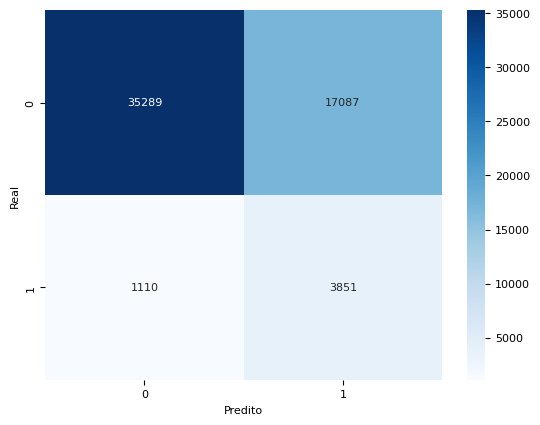

Sensitivity :  0.6737627921185275
Specificity :  0.7762547873412619
AUC = 0.7870322723752063 


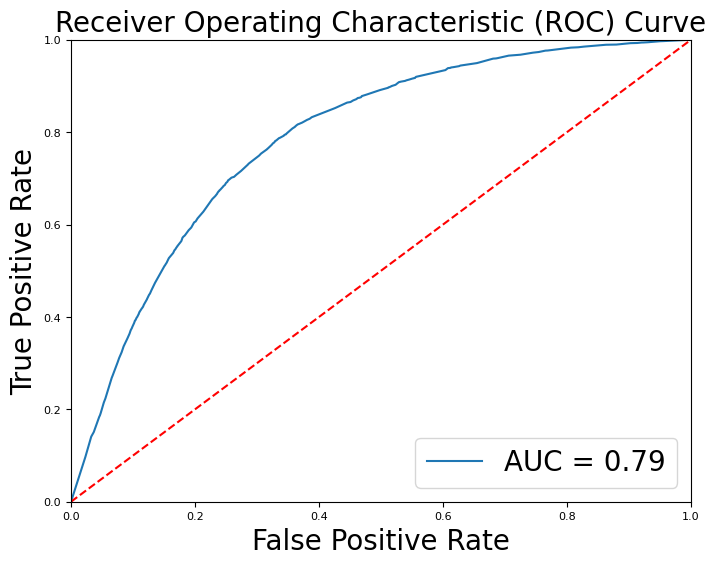

,Estado,AUC,sensitivity,specificity,Acurácia balanceada,Acurácia
0,None,0.787032,0.673763,0.776255,0.725009,0.682631


,Estado,AUC,sensitivity,specificity,Acurácia balanceada,Acurácia
0,None,0.787032,0.673763,0.776255,0.725009,0.682631


In [ ]:
file_path = "drive/My Drive/databetes/data/processed/PNS_2019/pns_model_test.csv"
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_test_cache = pd.read_csv(file_path)

# df_test = df_test_cache
df_test = df_test_cache.copy()
df_full_metrics = pd.DataFrame()

df_test = df_test_cache.copy()

df_test = df_test[['IMC', 'diabetes','pressao_alta','exercicio_fisico','grau_escolaridade', 'bebida_alcoolica','Idade']]

df_test = preprocess_subset(df_test)

X_test =  df_test.drop('diabetes', axis=1)
X_test =  df_test.drop(['cat_alcool_3','cat_alcool_6'], axis=1)

y_test = df_test['diabetes']
X_test=  X_test.drop('diabetes', axis=1)
try:
  X_test =X_test[ordem_colunas]
except KeyError:
  # "['grau_escolaridade_curso primário'] not in index"
  X_test['grau_escolaridade_curso primário'] = 0
  X_test =X_test[ordem_colunas]

y_pred = loaded_model.predict(X_test)
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

# print_classification_report(y_test, y_pred,y_pred_proba)
df_met = print_classification_report_with_df(y_test, y_pred,y_pred_proba)
display(df_met)
# df_full_metrics = df_full_metrics.concat(df_met)
df_full_metrics = pd.concat([df_full_metrics,df_met])

df_full_metrics

## por estado

In [ ]:
file_path = "drive/My Drive/databetes/data/processed/PNS_2019/pns_model_test.csv"
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_test_cache = pd.read_csv(file_path)

# df_test = df_test_cache
df_test = df_test_cache.copy()
df_full_metrics = pd.DataFrame()
for city in df_test['Unidade'].unique():

  df_test = df_test_cache.copy()
  print(city)
  df_test = df_test[df_test['Unidade'] == city]
  df_test = df_test[['IMC', 'diabetes','pressao_alta','exercicio_fisico','grau_escolaridade', 'bebida_alcoolica','Idade']]

  df_test = preprocess_subset(df_test)

  X_test =  df_test.drop('diabetes', axis=1)
  X_test =  df_test.drop(['cat_alcool_3','cat_alcool_6'], axis=1)

  y_test = df_test['diabetes']
  X_test=  X_test.drop('diabetes', axis=1)
  try:
    X_test =X_test[ordem_colunas]
  except KeyError:
    # "['grau_escolaridade_curso primário'] not in index"
    X_test['grau_escolaridade_curso primário'] = 0
    X_test =X_test[ordem_colunas]

  y_pred = loaded_model.predict(X_test)
  y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

  # print_classification_report(y_test, y_pred,y_pred_proba)
  df_met = print_classification_report_with_df(y_test, y_pred,y_pred_proba,state=city)
  display(df_met)
  # df_full_metrics = df_full_metrics.concat(df_met)
  df_full_metrics = pd.concat([df_full_metrics,df_met])

df_full_metrics

In [ ]:
df_full_metrics = df_full_metrics.sort_values(by=['AUC'],ascending=[False])
# df.sort_values(by=['col1','col2'],ascending=[True,False])

In [ ]:
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
plt.bar(df_full_metrics['Estado'], df_full_metrics['AUC'], color='blue')

# Configurar os rótulos dos eixos
plt.xlabel('Estado')
plt.ylabel('AUC')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=90)

# Adicionar título ao gráfico
plt.title('AUC por Estado')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Configurar o estilo do seaborn
sns.set_style('whitegrid')

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
sns.barplot(x='Estado', y='AUC', data=df_full_metrics, color='blue')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=90)

# Configurar os rótulos dos eixos
plt.xlabel('Estado')
plt.ylabel('AUC')

# Adicionar título ao gráfico
plt.title('AUC por Estado')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Configurar o estilo do seaborn
sns.set_style('whitegrid')

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar o gráfico de linha para AUC
sns.lineplot(x='Estado', y='AUC', data=df_full_metrics, marker='o', label='AUC')

# Criar o gráfico de linha para Acurácia
sns.lineplot(x='Estado', y='Acurácia balanceada', data=df_full_metrics, marker='o', label='Acurácia balanceada')

# Configurar os rótulos dos eixos
plt.xlabel('Estado')
plt.ylabel('Métrica')

# Adicionar título ao gráfico
plt.title('AUC e Acurácia balanceadarácia por estado')

# Exibir a legenda
plt.legend()
plt.xticks(rotation=90)
# Obter os rótulos dos estados
xtick_labels = df_full_metrics['Estado'].tolist()

# Configurar os marcadores apenas para Maranhão e Mato Grosso
for i, label in enumerate(xtick_labels):
    if label in ['Maranhão', 'Mato Grosso']:
        xtick_labels[i] = label + '   \n'  # Adicionar espaço e quebra de linha

# Definir os rótulos personalizados no eixo x
plt.gca().set_xticklabels(xtick_labels)


#
# Exibir o gráfico
plt.tight_layout()
plt.show()

### por região

In [ ]:
df_full_metrics

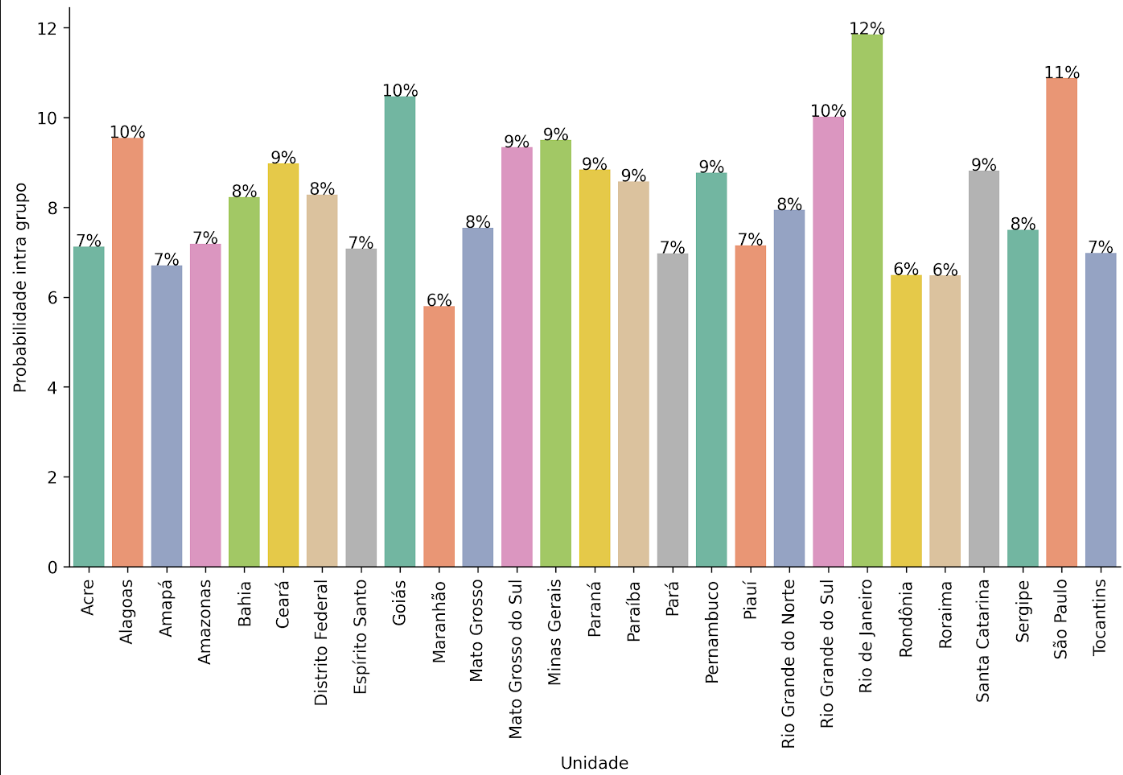

In [ ]:
# Definir os grupos de estados para cada região
norte_estados = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']
nordeste_estados = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']

# Filtrar os dados para as regiões desejadas
norte_df = df_full_metrics[df_full_metrics['Estado'].isin(norte_estados)]
nordeste_df = df_full_metrics[df_full_metrics['Estado'].isin(nordeste_estados)]

# Calcular as médias por região
norte_media = norte_df.mean().to_frame().T
nordeste_media = nordeste_df.mean().to_frame().T

# Adicionar o nome das regiões
norte_media['Região'] = 'Norte'
nordeste_media['Região'] = 'Nordeste'

# Concatenar os DataFrames das médias por região
result = pd.concat([norte_media, nordeste_media])

# Reorganizar as colunas
result = result[['Região', 'AUC', 'sensitivity', 'specificity', 'Acurácia balanceada', 'Acurácia']]

# Exibir a tabela resultante
display(result)

In [ ]:
# Definir os grupos de estados para cada região
norte_estados = ['Acre', 'Amazonas', 'Amapá', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']
nordeste_estados = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']
sudeste_estados = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']
centro_oeste_estados = ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul']
sul_estados = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']

# Filtrar os dados para as regiões desejadas
norte_df = df_full_metrics[df_full_metrics['Estado'].isin(norte_estados)]
nordeste_df = df_full_metrics[df_full_metrics['Estado'].isin(nordeste_estados)]
sudeste_df = df_full_metrics[df_full_metrics['Estado'].isin(sudeste_estados)]
centro_oeste_df = df_full_metrics[df_full_metrics['Estado'].isin(centro_oeste_estados)]
sul_df = df_full_metrics[df_full_metrics['Estado'].isin(sul_estados)]

# Calcular as médias por região
norte_media = norte_df.mean().to_frame().T
nordeste_media = nordeste_df.mean().to_frame().T
sudeste_media = sudeste_df.mean().to_frame().T
centro_oeste_media = centro_oeste_df.mean().to_frame().T
sul_media = sul_df.mean().to_frame().T

# Adicionar o nome das regiões
norte_media['Região'] = 'Norte'
nordeste_media['Região'] = 'Nordeste'
sudeste_media['Região'] = 'Sudeste'
centro_oeste_media['Região'] = 'Centro-Oeste'
sul_media['Região'] = 'Sul'

# Concatenar os DataFrames de média por região
df_regioes = pd.concat([norte_media, nordeste_media, sudeste_media, centro_oeste_media, sul_media])

# Reordenar as colunas
df_regioes = df_regioes[['Região', 'AUC', 'sensitivity', 'specificity', 'Acurácia balanceada', 'Acurácia']]

display(df_regioes)

In [ ]:
# Configurar o estilo do seaborn
sns.set_style('whitegrid')

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar o gráfico de linha para AUC
sns.lineplot(x='Região', y='AUC', data=df_regioes, marker='o', label='AUC')

# Criar o gráfico de linha para Acurácia
sns.lineplot(x='Região', y='Acurácia balanceada', data=df_regioes, marker='o', label='Acurácia balanceada')

# Configurar os rótulos dos eixos
plt.xlabel('Região')
plt.ylabel('Métrica')

# Adicionar título ao gráfico
plt.title('AUC e Acurácia balanceada por Região')

# Exibir a legenda
plt.legend()
plt.xticks(rotation=90)
# Obter os rótulos dos estados
xtick_labels = df_regioes['Região'].tolist()


#
# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
df_test_cache

# Estudo de caso

vamos escolher dois estados para analisar,  Mato Grosso e Maranhão,estados com métricas parecidas e diferenças sutis na proporção de diabéticos

### Mato Grosso

In [ ]:
file_path = "drive/My Drive/databetes/data/processed/PNS_2019/pns_model_test.csv"
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_test_cache = pd.read_csv(file_path)

# df_test = df_test_cache
df_test = df_test_cache.copy()
# df_full_metrics = pd.DataFrame()
for city in df_test['Unidade'].unique():
  if city == 'Mato Grosso':

    df_test = df_test_cache.copy()
    print(city)
    df_test = df_test[df_test['Unidade'] == city]
    df_test = df_test[['IMC', 'diabetes','pressao_alta','exercicio_fisico','grau_escolaridade', 'bebida_alcoolica','Idade']]

    df_test = preprocess_subset(df_test)

    X_test =  df_test.drop('diabetes', axis=1)
    X_test =  df_test.drop(['cat_alcool_3','cat_alcool_6'], axis=1)

    y_test = df_test['diabetes']
    X_test=  X_test.drop('diabetes', axis=1)
    try:
      X_test =X_test[ordem_colunas]
    except KeyError:
      # "['grau_escolaridade_curso primário'] not in index"
      X_test['grau_escolaridade_curso primário'] = 0
      X_test =X_test[ordem_colunas]

    y_pred = loaded_model.predict(X_test)
    y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

    # print_classification_report(y_test, y_pred,y_pred_proba)
    df_met = print_classification_report_with_df(y_test, y_pred,y_pred_proba,state=city)
    display(df_met)

    # df_full_metrics = df_full_metrics.concat(df_met)
    # df_full_metrics = pd.concat([df_full_metrics,df_met])

# df_full_metrics

In [ ]:
y_pred
# Contando os 0s e 1s
contagem = np.bincount(y_pred)

# Obtendo a contagem de 0s e 1s
zeros = contagem[0]
uns = contagem[1]

# Calculando a proporção
proporcao = (uns / (zeros + uns))*100

# Exibindo os resultados
print(f"Quantidade de Não Diabéticos: {zeros}")
print(f"Quantidade de Diabéticos: {uns}")
print(f"Proporção de Diabéticos: {proporcao:.2f}%")

In [ ]:
contagem = np.bincount(y_test)

# Obtendo a contagem de 0s e 1s
zeros = contagem[0]
uns = contagem[1]

# Calculando a proporção
proporcao = (uns / (zeros + uns))*100

# Exibindo os resultados
print(f"Quantidade de Não Diabéticos: {zeros}")
print(f"Quantidade de Diabéticos: {uns}")
print(f"Proporção de Diabéticos: {proporcao:.2f}%")

In [ ]:
X_train

In [ ]:
X_train.columns

In [ ]:
# df_lime = df_train.drop('diabetes', axis=1)
# print(list(df_lime.columns))
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(X_train.columns),
#                                                     class_names=['0', '1'], discretize_continuous=True)
scaler = MinMaxScaler()
normalized_X_test = scaler.fit_transform(X_test)
# X_val = normalized_X_val
explanation = explainer.explain_instance(normalized_X_test[0], loaded_model.predict_proba, num_features=len(X_test.columns))

In [ ]:
X_test

In [ ]:
from pprint import pprint
l =[]
c=0
for i in range(0,100):
  c+=1
  if c < 15:
    print(f'mostrando valores para a pessoa {i} ')
    if y_val[i]==y_pred[i]:
      print(f"modelo acertou, preveu {y_pred[i]} e era {y_val[i]}")
    else:
      print(f"modelo errou, preveu {y_pred[i]} e era {y_val[i]}")
  df = pd.DataFrame([normalized_X_test[i]], columns=df_val.drop('diabetes', axis=1).columns)
  df['diabetes_real']=y_val[i]
  df['diabetes_predito']=y_pred[i]

  explanation = explainer.explain_instance(normalized_X_test[i], model.predict_proba, num_features=len(X_test.columns))

  a=explanation.as_list()
  l.append(a)
  if c < 5:
    explanation.show_in_notebook(show_table=True)


In [ ]:
for i in range(len(l)):

  values = []
  features = []
  for f in range(len(l[i])):

    feature_ = l[i][f][0]
    value = l[i][f][1]
    features.append(feature_)
    # values.append(value)

# print(f'\n\n lista: {values}\n{features}')

df_explanations = pd.DataFrame(columns=features)
expp = []

for i in range(len(l)):

  values = []
  features = []
  for f in range(len(l[i])):

    feature_ = l[i][f][0]
    value = l[i][f][1]
    features.append(feature_)
    values.append(value)

  # print(f'\n\n lista: {values}\n{features}')
  # Create a dataframe with one row
  new_row = pd.DataFrame([values], columns=features)
  # display(new_row)
  # df_explanations.loc[i] = values
  # Add the row to the master dataframe
  df_explanations = df_explanations.append(new_row, ignore_index=True)
  # display(df_explanations)

# display(df_componentes)

o modelo aprendeu que, pra esse público

In [ ]:
display(df_explanations)

In [ ]:
mean_values = []
columns = []

for column in df_explanations.columns:
    column_mean = df_explanations[column].mean()
    mean_values.append(column_mean)
    columns.append(column)
    print(f"Mean of {column}: {column_mean}")

# Create a dataframe from columns and mean values
data = {'Columns': columns, 'Mean': mean_values}
df_means = pd.DataFrame(data)

# Filter the dataframe for top 5 and bottom 5 columns
top_5_columns = df_means.nlargest(5, 'Mean')
bottom_5_columns = df_means.nsmallest(5, 'Mean')

# Combine the top and bottom dataframes
filtered_df = pd.concat([top_5_columns, bottom_5_columns])

# Create a bar plot of the mean values for the filtered dataframe
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Columns'], filtered_df['Mean'])
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean Values of Top 5 and Bottom 5 Columns')
plt.show()

### Maranhão - 6% diabéticos

In [ ]:
file_path = "drive/My Drive/databetes/data/processed/PNS_2019/pns_model_test.csv"
# file_path = '../data/Vigitel-2019-peso-rake.xls'
# df = pd.read_excel(file_path, sheet_name='Sheet1')
df_test_cache = pd.read_csv(file_path)

# df_test = df_test_cache
df_test = df_test_cache.copy()
# df_full_metrics = pd.DataFrame()
for city in df_test['Unidade'].unique():
  if 'Maranhão' in city:

    df_test = df_test_cache.copy()
    print(city)
    df_test = df_test[df_test['Unidade'] == city]
    df_test = df_test[['IMC', 'diabetes','pressao_alta','exercicio_fisico','grau_escolaridade', 'bebida_alcoolica','Idade']]

    df_test = preprocess_subset(df_test)

    X_test =  df_test.drop('diabetes', axis=1)
    X_test =  df_test.drop(['cat_alcool_3','cat_alcool_6'], axis=1)

    y_test = df_test['diabetes']
    X_test=  X_test.drop('diabetes', axis=1)
    try:
      X_test =X_test[ordem_colunas]
    except KeyError:
      # "['grau_escolaridade_curso primário'] not in index"
      X_test['grau_escolaridade_curso primário'] = 0
      X_test =X_test[ordem_colunas]

    y_pred = loaded_model.predict(X_test)
    y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

    # print_classification_report(y_test, y_pred,y_pred_proba)
    df_met = print_classification_report_with_df(y_test, y_pred,y_pred_proba,state=city)
    display(df_met)

In [ ]:
y_pred
# Contando os 0s e 1s
contagem = np.bincount(y_pred)

# Obtendo a contagem de 0s e 1s
zeros = contagem[0]
uns = contagem[1]

# Calculando a proporção
proporcao = (uns / (zeros + uns))*100

# Exibindo os resultados
print(f"Quantidade de Não Diabéticos: {zeros}")
print(f"Quantidade de Diabéticos: {uns}")
print(f"Proporção de Diabéticos: {proporcao:.2f}%")

In [ ]:
contagem = np.bincount(y_test)

# Obtendo a contagem de 0s e 1s
zeros = contagem[0]
uns = contagem[1]

# Calculando a proporção
proporcao = (uns / (zeros + uns))*100

# Exibindo os resultados
print(f"Quantidade de Não Diabéticos: {zeros}")
print(f"Quantidade de Diabéticos: {uns}")
print(f"Proporção de Diabéticos: {proporcao:.2f}%")

## Porque o modelo está falando isso? qual o motivo das predições de forma geral? lime para cada cidade

In [ ]:
# df_lime = df_train.drop('diabetes', axis=1)
# print(list(df_lime.columns))
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(df_lime.columns),
#                                                     class_names=['0', '1'], discretize_continuous=True)
scaler = MinMaxScaler()
normalized_X_test = scaler.fit_transform(X_test)
# X_val = normalized_X_val
explanation = explainer.explain_instance(normalized_X_test[0], loaded_model.predict_proba, num_features=len(df_lime.columns))

In [ ]:
explanation.show_in_notebook(show_table=True)

In [ ]:
from pprint import pprint
l =[]
c=0
for i in range(0,100):
  c+=1
  if c < 5:
    print(f'mostrando valores para a pessoa {i} ')
    if y_val[i]==y_pred[i]:
      print(f"modelo acertou, preveu {y_pred[i]} e era {y_val[i]}")
    else:
      print(f"modelo errou, preveu {y_pred[i]} e era {y_val[i]}")
  df = pd.DataFrame([normalized_X_test[i]], columns=df_val.drop('diabetes', axis=1).columns)
  df['diabetes_real']=y_val[i]
  df['diabetes_predito']=y_pred[i]

  explanation = explainer.explain_instance(normalized_X_test[i], model.predict_proba, num_features=len(df_train.columns))

  a=explanation.as_list()
  l.append(a)
  if c < 5:
    explanation.show_in_notebook(show_table=True)


In [ ]:
for i in range(len(l)):

  values = []
  features = []
  for f in range(len(l[i])):

    feature_ = l[i][f][0]
    value = l[i][f][1]
    features.append(feature_)
    # values.append(value)

# print(f'\n\n lista: {values}\n{features}')

df_explanations = pd.DataFrame(columns=features)
expp = []

for i in range(len(l)):

  values = []
  features = []
  for f in range(len(l[i])):

    feature_ = l[i][f][0]
    value = l[i][f][1]
    features.append(feature_)
    values.append(value)

  # print(f'\n\n lista: {values}\n{features}')
  # Create a dataframe with one row
  new_row = pd.DataFrame([values], columns=features)
  # display(new_row)
  # df_explanations.loc[i] = values
  # Add the row to the master dataframe
  df_explanations = df_explanations.append(new_row, ignore_index=True)
display(df_explanations)

# display(df_componentes)

o modelo aprendeu que, pra esse público

In [ ]:
display(df_explanations)

In [ ]:
# df_explanations['pressao_alta_não'].median()

In [ ]:

# Calculate the mean for each column
mean_values = []
columns = []

for column in df_explanations.columns:
    column_mean = df_explanations[column].mean()
    mean_values.append(column_mean)
    columns.append(column)
    print(f"Mean of {column}: {column_mean}")
mean_values
# Create a bar plot of the mean values
plt.figure(figsize=(10, 6))
plt.bar(columns, mean_values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean Values of Columns')
plt.show()


In [ ]:
mean_values = []
columns = []

for column in df_explanations.columns:
    column_mean = df_explanations[column].mean()
    mean_values.append(column_mean)
    columns.append(column)
    print(f"Mean of {column}: {column_mean}")

# Create a dataframe from columns and mean values
data = {'Columns': columns, 'Mean': mean_values}
df_means = pd.DataFrame(data)

# Filter the dataframe for top 5 and bottom 5 columns
top_5_columns = df_means.nlargest(5, 'Mean')
bottom_5_columns = df_means.nsmallest(5, 'Mean')

# Combine the top and bottom dataframes
filtered_df = pd.concat([top_5_columns, bottom_5_columns])

# Create a bar plot of the mean values for the filtered dataframe
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Columns'], filtered_df['Mean'])
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean Values of Top 5 and Bottom 5 Columns')
plt.show()